In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
# to be runned with anaconda3 - no conda env !

In [2]:
first_year = 1980
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

In [3]:
print('loading index...')
df = pd.read_csv('/home/hbkoziel/awi-models/data/mesh/meshArc4.5/bioregion_index_latlon.csv', delimiter=',',header=0)
print('DONE')

loading index...
DONE


In [5]:
print('loading data...')
DATA = np.genfromtxt('/scratch/usr/hbkoziel/Arc12/CSV/NPPannual_1980_2015_timeseries.csv', delimiter=';')
print('DONE')

loading data...
DONE


In [6]:
meshpath    = '/home/hbkoziel/awi-models//data/mesh/meshArc4.5/'
ncfile      = meshpath+'Arc4.5.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalAreaModel = f.variables['cluster_area'][:]

In [11]:
df.sort_values(by ='Unique_ID',inplace=True)
index = df["Unique_ID"]
index_unique = df.Unique_ID.unique().tolist()
index_unique.pop(-1)
#index_unique = np.array(index_unique)
#index_unique = index_unique.astype(int)
index_unique

[24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0]

In [13]:
names = df.Name.unique().tolist()
names.pop(-1)
names

['Arctic Ocean -- Atlantic Basin',
 'Arctic Ocean -- Pacific Basin',
 'Baffin Bay -- Canadian Shelf',
 'Beaufort Sea - continental coast and shelf',
 'Beaufort-Amundsen-Viscount Melville-Queen Maud',
 'Chukchi Sea',
 'Baffin Bay',
 'East Greenland Shelf',
 'East Siberian Sea',
 'Eastern Bering Sea',
 'Fram Strait',
 'High Arctic Archipelago',
 'Hudson Complex',
 'Iceland Shelf',
 'Kara Sea',
 'Labrador Sea Basin',
 'Lancaster Sound',
 'Laptev Sea',
 'North Greenland',
 'North and East Barents Sea',
 'Northern Grand Banks - Southern Labrador',
 'Northern Labrador',
 'Northern Norway and Finnmark',
 'Norwegian Sea',
 'West Greenland Shelf',
 'Western Bering Sea',
 'White Sea']

In [15]:
names[3]='Beaufort Sea - shelf'
names[4]='Amundsen-Viscount'
names.append('All Arctic Ocean (>66°N)')
names

['Arctic Ocean -- Atlantic Basin',
 'Arctic Ocean -- Pacific Basin',
 'Baffin Bay -- Canadian Shelf',
 'Beaufort Sea - shelf',
 'Amundsen-Viscount',
 'Chukchi Sea',
 'Baffin Bay',
 'East Greenland Shelf',
 'East Siberian Sea',
 'Eastern Bering Sea',
 'Fram Strait',
 'High Arctic Archipelago',
 'Hudson Complex',
 'Iceland Shelf',
 'Kara Sea',
 'Labrador Sea Basin',
 'Lancaster Sound',
 'Laptev Sea',
 'North Greenland',
 'North and East Barents Sea',
 'Northern Grand Banks - Southern Labrador',
 'Northern Labrador',
 'Northern Norway and Finnmark',
 'Norwegian Sea',
 'West Greenland Shelf',
 'Western Bering Sea',
 'White Sea',
 'All Arctic Ocean (>66°N)']

In [16]:
pp = np.zeros((36,28))

for bio_id in range(0,28):
    #print(['bioregion name = ',names[bio_id],'; numeric id =',bio_id+24])
    for ind in range(0,len(years)):
        #print years[ind]
        if bio_id ==27:
            ind_arc = df.full_index[df.lat > 66]
            pp[ind,bio_id] = np.sum(DATA[ind,ind_arc]*NodalAreaModel[ind_arc])
        else:
            #df_lon.lon[df.full_index[index==num_id]]
            ind_bio = df.full_index[df.Unique_ID == bio_id+24]
            pp[ind,bio_id] = np.sum(DATA[ind,ind_bio]*NodalAreaModel[ind_bio])

In [17]:
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

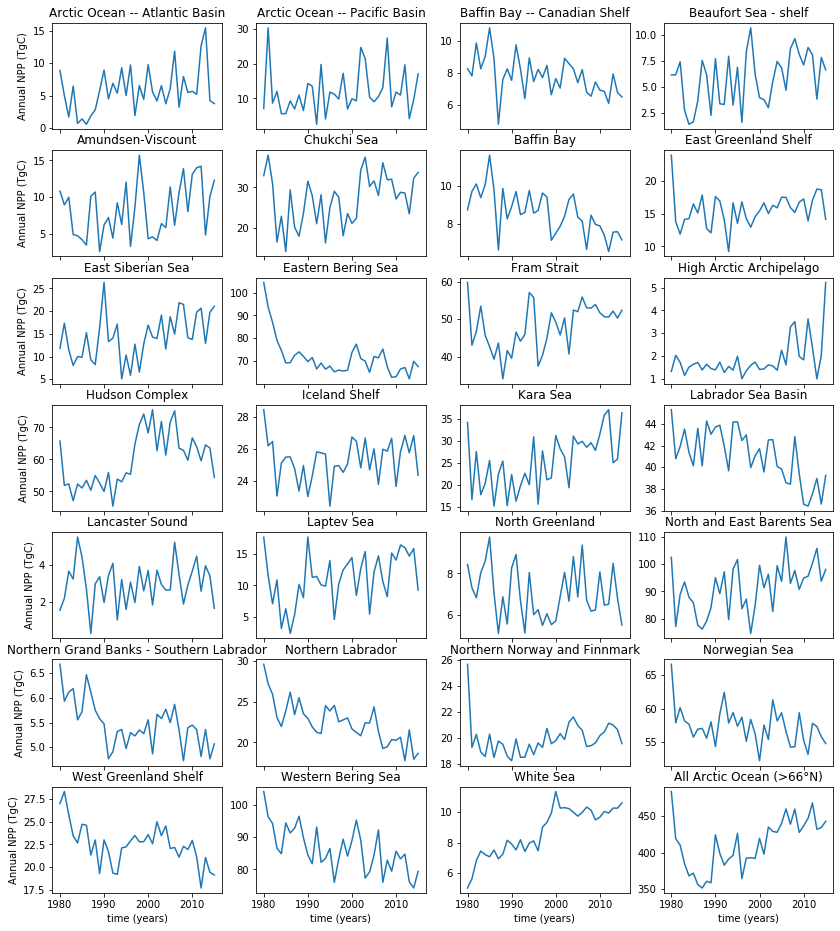

In [19]:
figsize = (14, 16)
rows,cols = 7,4
regions = range(0,28)

axs = plt.figure(figsize=figsize, constrained_layout=False).subplots(rows,cols,sharey=False,sharex=True)
axs = trim_axs(axs, len(regions))

for ax, b in zip(axs, regions):
    ax.plot(years,pp[:,b]/10**15)
    ax.set_title(names[b])
    if b in np.arange(0,28,4):
        ax.set_ylabel('Annual NPP (TgC)')
    if b in np.arange(24,28):
        ax.set_xlabel('time (years)')
    
plt.savefig('/home/hbkoziel/pyfesom/figures/Arc12/sertemp/NPPannual_timeseries_1980_2015.png', dpi = 300, bbox_inches='tight')    
plt.savefig('/home/hbkoziel/earth-analytics-python-env/figures/NPPannual_timeseries_1980_2015.png', dpi = 300, bbox_inches='tight')      